##### ARTI 560 - Computer Vision  
## Image Classification using Transfer Learning - Exercise 

### Objective

In this exercise, you will:

1. Select another pretrained model (e.g., VGG16, MobileNetV2, or EfficientNet) and fine-tune it for CIFAR-10 classification.  
You'll find the pretrained models in [Tensorflow Keras Applications Module](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

2. Before training, inspect the architecture using model.summary() and observe:
- Network depth
- Number of parameters
- Trainable vs Frozen layers

3. Then compare its performance with ResNet and the custom CNN.

### Questions:

- Which model achieved the highest accuracy?
- Which model trained faster?
- How might the architecture explain the differences?

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

y_train = y_train.squeeze().astype("int64")
y_test  = y_test.squeeze().astype("int64")

x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")


data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="augmentation")

# 1) MobileNetV2 backbone
mobilenet_base = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
mobilenet_base.trainable = False 

# 2) Full Model Architecture
mobilenet_model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    data_augmentation,
    layers.Resizing(224, 224, interpolation="bilinear"),
    layers.Lambda(preprocess_input), 
    mobilenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(10)
], name="cifar10_mobilenetv2")

# 3) Phase 1: Initial Training
mobilenet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

print("Starting Initial Training...")
mobilenet_model.fit(x_train, y_train, validation_split=0.1, epochs=3, batch_size=32)

# 4) Phase 2: Fine-Tuning
mobilenet_base.trainable = True
for layer in mobilenet_base.layers[:100]:
    layer.trainable = False

mobilenet_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

print("\nStarting Fine-Tuning...")
mobilenet_model.fit(x_train, y_train, validation_split=0.1, epochs=6, initial_epoch=3)

Starting Initial Training...
Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1076s 742ms/step - accuracy: 0.6661 - loss: 0.9634 - val_accuracy: 0.8124 - val_loss: 0.5423
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1068s 759ms/step - accuracy: 0.7234 - loss: 0.8025 - val_accuracy: 0.8234 - val_loss: 0.5239
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1060s 754ms/step - accuracy: 0.7291 - loss: 0.7875 - val_accuracy: 0.7880 - val_loss: 0.6423

Starting Fine-Tuning...
Epoch 4/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2015s 1s/step - accuracy: 0.7063 - loss: 0.8713 - val_accuracy: 0.8318 - val_loss: 0.4919
Epoch 5/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5173s 4s/step - accuracy: 0.7777 - loss: 0.6469 - val_accuracy: 0.8514 - val_loss: 0.4131
Epoch 6/6
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1936s 1s/step - accuracy: 0.8057 - loss: 0.5643 - val_accuracy: 0.8676 - val_loss: 0.3742


Below is the artecture for the mobilenet model

I added as a picture because i forgot to add it Here in VSCODE and it was running very slow, so I run the code in colab GPU and print it below

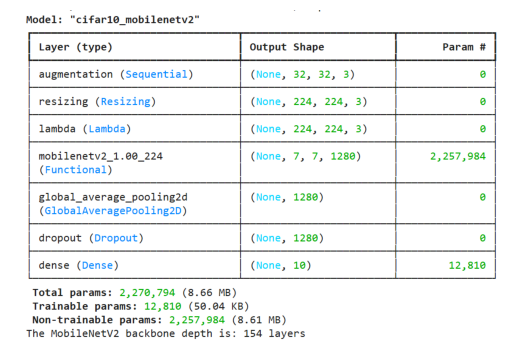

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = r'C:\Users\fh236\Documents\2nd Term Semester\CV\LAB\lab2.png'
img = mpimg.imread(path)

plt.imshow(img)
plt.axis('off')
plt.show()

- Network depth = 154 layer

- Number of parameters = 2,270,794

- Trainable vs Frozen layers = Frozen Layers: 154 , Trainable Layers: 0


Final model Comparision

In [ ]:
results = {
    "Custom CNN test acc": 0.8741999864578247,          
    "ResNet fine-tuned test acc": 0.9161999821662903,   
    "MobileNetV2 fine-tuned val acc": 0.8676            
}

print("\n--- Model Comparison Summary ---")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

best_model = max(results, key=results.get)
print(f"\nModel with highest accuracy: {best_model}")


--- Model Comparison Summary ---
Custom CNN test acc: 0.8742
ResNet fine-tuned test acc: 0.9162
MobileNetV2 fine-tuned val acc: 0.8676

Model with highest accuracy: ResNet fine-tuned test acc


- Which model achieved the highest accuracy? ResNet
- Which model trained faster? Custom CNN
- How might the architecture explain the differences? small number of parameter will train faster like custom cnn, and using risduals in resnet made it more accurate.